In [420]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as sp
from numpy import random as rand



In [421]:
def coin_toss(N,f):
    np.random.seed(1)
    toss = rand.uniform(low=0.0, high=1.0, size=N)
    head_frequency = np.sum(toss < f)
    
    return head_frequency
 

In [422]:

def likelihood(N,f):
    n =coin_toss(N,f)/N
    
    probability=st.binom.stats(N,n) 
    
    return probability,n


In [423]:
def r(n,N,f):
    rm=st.binom.pmf(n,N,f)
    
    return rm

 **Answer 1.a considering the input bias as 1/3**

We see the estimated value of f is 0.350000 and the error is  0.047697


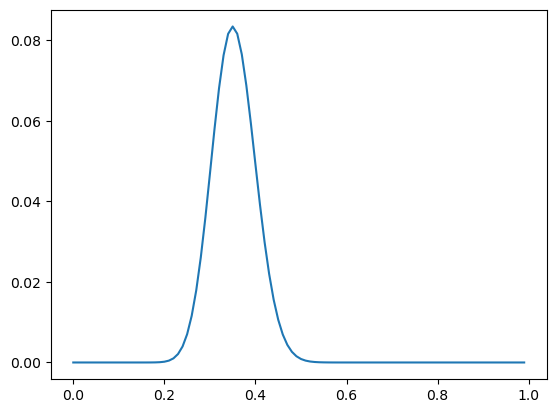

In [439]:

np.random.seed(1)
f=1/3.
N = 100
mean,var = likelihood(N,f)[0]
Mean= mean/N
var/=N**2
var=np.sqrt(var)
print('We see the estimated value of f is %f and the error is  %f'%(Mean,var))

x=np.arange(0,1,0.01)
plt.plot(x,r(mean,float(N),x))
plt.show()    

**Solution for answer 1.b.

the estimated value of f is 1.000000 and the error is  0.000000


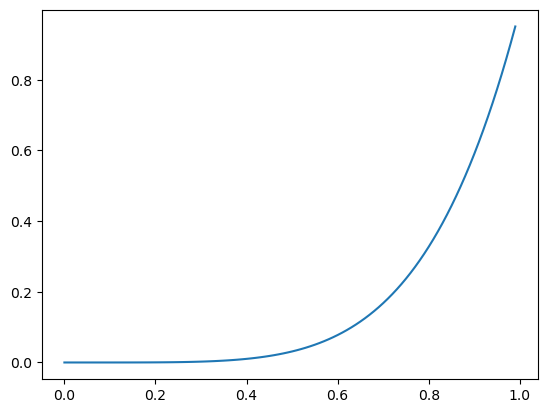

In [438]:
f =0.9
N = 5
# $f$ will be 1 since we get 5 heads
mean,var = likelihood(N,f)[0]
Mean= mean/N
var/=N**2
print('the estimated value of f is %f and the error is  %f'%(Mean,var))
x=np.arange(0,1,0.01)
plt.plot(x,r(mean,float(N),x))
plt.show()   

**1.c Now we will see the Hypothesis Testing**

In [426]:
f=0.5
N = 100
mean,var = likelihood(N,f)[0]
Mean_0= mean/N
var/=N**2
error_nonbias=np.sqrt(var)
print('the estimated value of f when input bias is 0.5 is %f and the error is  %f'%(Mean_0,var))


f=1/3.
N = 100
mean,var = likelihood(N,f)[0]
Mean_f1= mean/N
var/=N**2
var=np.sqrt(var)
print('the estimated value of f is %f and the error is  %f'%(Mean_f1,var))

f=1.
N = 5
mean,var = likelihood(N,f)[0]
Mean_f2= mean/N
var/=N**2
var=np.sqrt(var)
print('the estimated value of f is %f and the error is  %f'%(Mean_f2,var))

z1 = np.linalg.norm(Mean_f1-Mean_0)/error_nonbias
z2 = np.linalg.norm(Mean_f2-Mean_0)/error_nonbias
print(z1)
print(z2)




the estimated value of f when input bias is 0.5 is 0.510000 and the error is  0.002499
the estimated value of f is 0.350000 and the error is  0.047697
the estimated value of f is 1.000000 and the error is  0.000000
3.200640192064023
9.801960588196067


**In the second answer we saw that the posterior is a Binomial distribution with $n'=n+\alpha-1$ and$N'=N+2\alpha-2$, where $\alpha$ is a parameter of the Beta - distribution.**

In [427]:
def posterior(N,f,i):
    n =coin_toss(N,f)
    
    #int(n)
    n = n+i-1
    #rint('The new value of n is:',n)
    N_new = N+2*(i-1)
    #rint('The new value of N is:',N_new)
    n_new = n/N_new
    p1,p2=st.binom.stats(N_new,n_new)
    
    return p1,p2,N_new

#rint(np.terior(100,1/3,1))
  


the estimated value of f is 0.350000 and the error is  0.047697
the estimated value of f is 0.392857 and the error is  0.041276
the estimated value of f is 0.416667 and the error is  0.036747
the estimated value of f is 0.431818 and the error is  0.033395
the estimated value of f is 0.442308 and the error is  0.030802


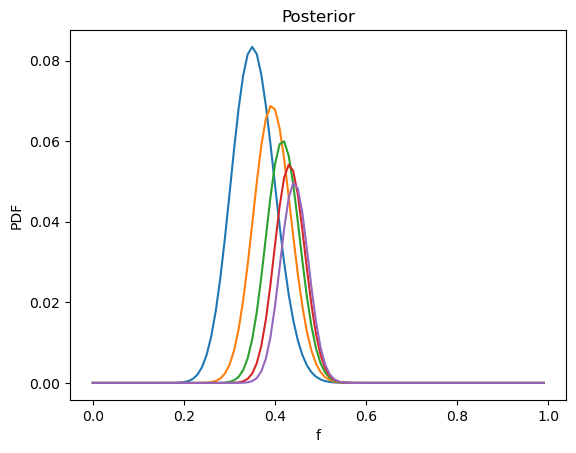

In [428]:
for i in range(1,100,20):
    N=100
    f = 1/3.
    mean,var = posterior(N,f,i)[:2]
    N_new = (posterior(N,f,i)[2])
    Mean= mean/N_new
    var/=N_new**2
    var=np.sqrt(var)
    print('the estimated value of f is %f and the error is  %f'%(Mean,var))
    x=np.arange(0,1,0.01)
    plt.plot(x,r(mean,float(N_new),x))
    
plt.title('Posterior')
plt.xlabel('f')
plt.ylabel('PDF')
plt.show()  

the estimated value of f is 1.000000 and the error is  0.000000
the estimated value of f is 0.555556 and the error is  0.074074
the estimated value of f is 0.529412 and the error is  0.054139
the estimated value of f is 0.520000 and the error is  0.044686
the estimated value of f is 0.515152 and the error is  0.038907


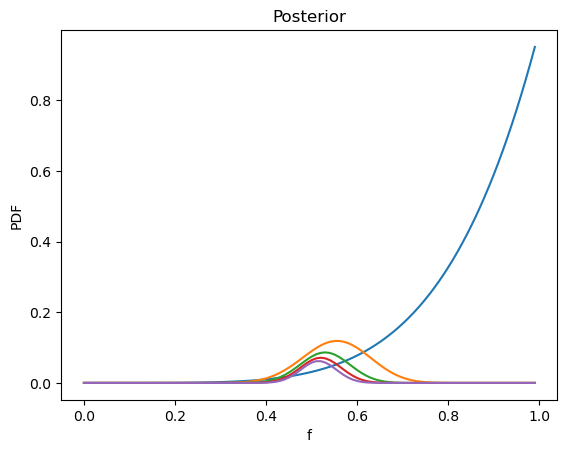

In [429]:
for i in range(1,100,20):
    N=5
    f = 1.
    mean,var = posterior(N,f,i)[:2]
    N_new = (posterior(N,f,i)[2])
    Mean= mean/N_new
    var/=N_new**2
    var=np.sqrt(var)
    print('the estimated value of f is %f and the error is  %f'%(Mean,var))
    x=np.arange(0,1,0.01)
    plt.plot(x,r(mean,float(N_new),x))
    
plt.title('Posterior')
plt.xlabel('f')
plt.ylabel('PDF')
plt.show()   

In [430]:
def Bayes_factor(N,f,i):
    n = coin_toss(N,f)
    n = n+i-1
    N_new = N+2*(i-1)
    b_factor = sp.comb(N_new,n)*sp.beta(i,i)/(N_new*2**N)
    return b_factor
    

In [431]:
print(Bayes_factor(100,1/3,1))
print(Bayes_factor(5,1,1))

8.638556657416525e-06
0.00625
